In [1]:
import pandas as pd
df=pd.read_csv("d:/data/bmi/bmi.csv")
df.head()

,height,weight,label
0,185,45,1
1,167,37,1
2,191,79,2
3,122,73,3
4,182,62,2


In [2]:
train_cols=df.columns[0:2]
X=df[train_cols]
y=df["label"]

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["label"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [4]:
df2["label"].value_counts()

3    5896
2    5896
1    5896
Name: label, dtype: int64

In [5]:
X=X_samp[train_cols]
y=y_samp["label"]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
  stratify=y,random_state=10)

Text(0.5, 0, 'number of clusters')

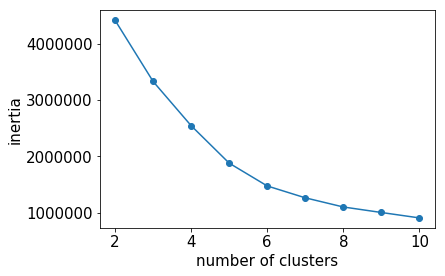

In [8]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters=range(2,11) #2~10개의 클러스터 
# inertias 중심과 각 데이터의 거리를 모두 합산한 값
inertias=[] 
for n in clusters:
    model=KMeans(n_clusters=n, random_state=10) #군집 모형 생성
    model.fit(X_train) #군집 나누기
    inertias.append(model.inertia_)
    
plt.rcParams["font.size"]=15
plt.plot(clusters,inertias,"-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")
#엘보우 기법(팔꿈치처럼 꺾이는 부분이 최적의 k)

In [13]:
model=KMeans(n_clusters=5,random_state=10)
model.fit(X_train)
pred=model.predict(X_test)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,pred)

0.3793606305458362

In [16]:
model=KMeans(n_clusters=3,random_state=10)
model.fit(X_train)
pred=model.predict(X_test)

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,pred)

0.35129271508723653

[[187.21973184  58.78507104]
 [133.50536913  56.88232662]
 [160.85073671  55.47277386]]


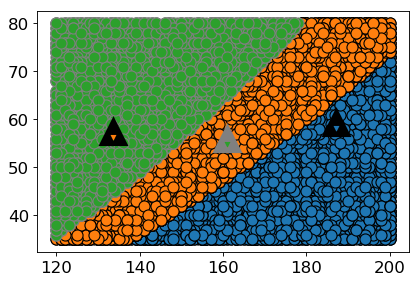

In [19]:
import mglearn

plt.rcParams["figure.dpi"]=80 #그래프의 해상도
#샘플의 산점도
mglearn.discrete_scatter(X["height"],X["weight"],y,markers="o")
print(model.cluster_centers_)
#중심좌표의 산점도
mglearn.discrete_scatter(
    model.cluster_centers_[:,0],
    model.cluster_centers_[:,1], 
    [1,2,3], markers="^", markeredgewidth=10
)

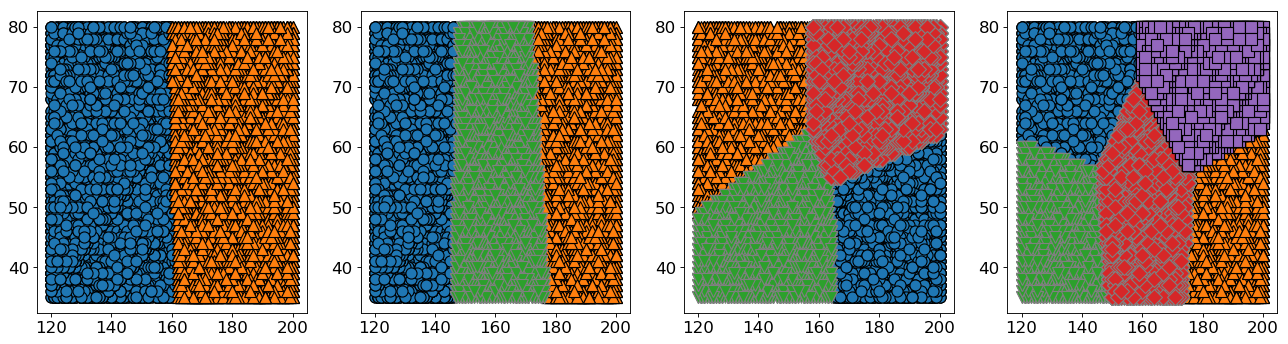

In [20]:
import mglearn
from matplotlib import pyplot as plt
#1행 4열의 서브플롯
fig,axes=plt.subplots(1,4,figsize=(20,5)) 
idx=0
for k in [2,3,4,5]: #군집의 갯수 2~5
    kmeans=KMeans(n_clusters=k) #군집갯수 입력
    kmeans.fit(X) #학습
    lbls=kmeans.labels_ #모형에서 분류한 클래스
    #산점도 그리기
    mglearn.discrete_scatter(X["height"],X["weight"],lbls,ax=axes[idx])
    idx += 1